In [1]:
sam_file="/home/wuyou/Projects/Os_AD/data/unmod.sorted.sam"
gene_list=[]
with open(sam_file) as f:
    count_dict_unmod={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        mapped_reads_count+=1
        if contig not in count_dict_unmod:
            count_dict_unmod[contig]=0
        count_dict_unmod[contig]+=1
        if contig not in gene_list:
            gene_list.append(contig)

print(len(count_dict_unmod))

3119


In [2]:
sam_file="/home/wuyou/Projects/Os_AD/data/m5C.sorted.sam"
gene_list=[]
with open(sam_file) as f:
    count_dict_m5C={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        mapped_reads_count+=1
        if contig not in count_dict_m5C:
            count_dict_m5C[contig]=0
        count_dict_m5C[contig]+=1
        if contig not in gene_list:
            gene_list.append(contig)
            

print(len(count_dict_m5C))
print(mapped_reads_count)

5232
303881


In [3]:
sam_file="/data/wuyou/TandemMod_crop/data/IVET_ac4C/ac4C.sam"
gene_list=[]
with open(sam_file) as f:
    count_dict_ac4C={}
    mapped_reads_count=0
    for line in f:
        contig=line.split("\t")[2]
        flag=line.split("\t")[1]
        if flag!="0":
            continue
        mapped_reads_count+=1
        if contig not in count_dict_ac4C:
            count_dict_ac4C[contig]=0
        count_dict_ac4C[contig]+=1
        if contig not in gene_list:
            gene_list.append(contig)
print(len(count_dict_ac4C))
print(mapped_reads_count)            

11387
386863


In [14]:
import pandas as pd

data=pd.DataFrame({"C":count_dict_unmod.keys()})
data.to_csv("data/IVT_transcripts_C.csv")

data=pd.DataFrame({"m5C":count_dict_m5C.keys()})
data.to_csv("data/IVT_transcripts_m5C.csv")

data=pd.DataFrame({"ac4C":count_dict_ac4C.keys()})
data.to_csv("data/IVT_transcripts_ac4C.csv")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

Loading required package: ggplot2



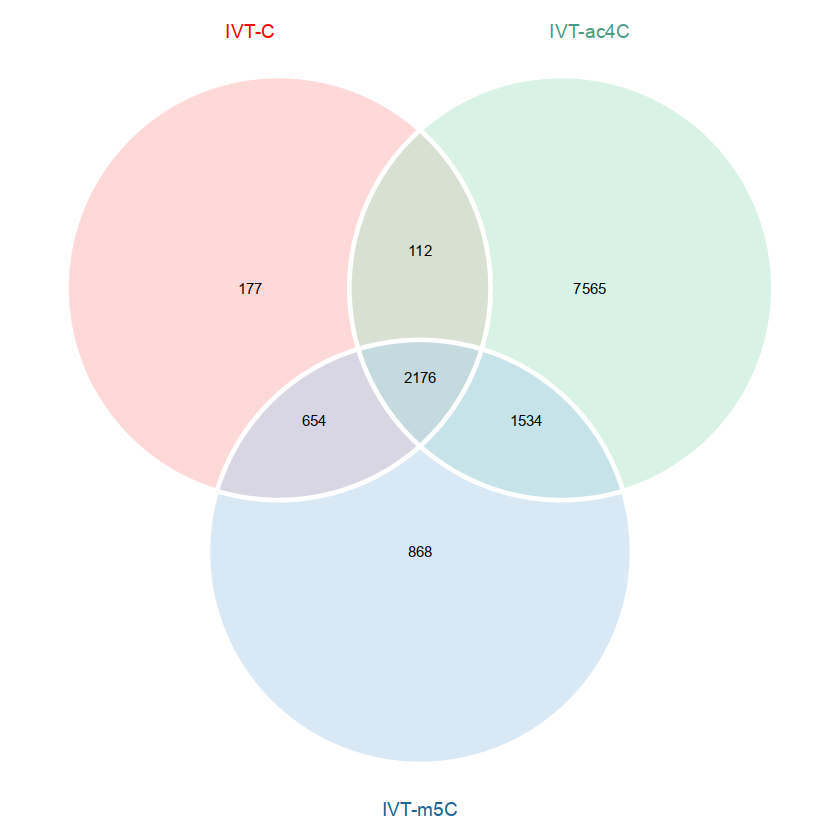

In [1]:
#R venn plot

library(ggvenn)


df1 <- read.table("data/IVT_transcripts_C.csv",sep=",",header=1)
df2 <- read.table("data/IVT_transcripts_m5C.csv",sep=",",header=1)
df3 <- read.table("data/IVT_transcripts_ac4C.csv",sep=",",header=1)


x<-list(`IVT-C`=df1$C,
        `IVT-m5C`=df2$m5C,
        `IVT-ac4C`=df3$ac4C)




p <- ggvenn(x,
       c("IVT-C","IVT-ac4C", "IVT-m5C"),
       show_percentage = F,
       stroke_color = "white",
       fill_color = c("#ffb2b2","#b2e7cb","#b2d4ec"),
       set_name_color = c("#ff0000","#4a9b83","#1d6295"),
       text_size = 3,
       set_name_size = 4,

    )
       #set_name_color = c("#ff0000","#4a9b83","#1d6295"))

#color: "#BEB8DC","#FA7F6F","#82B0D2","#FFBE7A","#8ECFC9",
# "#E7DAD2","#999999"


p
ggsave("figure/venn_plot_transcript_count.pdf", width = 6, height = 7, units = "cm",device = 'pdf', dpi = 600)




In [4]:
import numpy as np

count_dict_overlap={}

for contig in count_dict_unmod:

    if contig not in count_dict_overlap:
        count_dict_overlap[contig]=[0]*3
    count_dict_overlap[contig][0]=count_dict_unmod[contig]
    


for contig in count_dict_m5C:

    if contig not in count_dict_overlap:

        count_dict_overlap[contig]=[0]*3
    count_dict_overlap[contig][1]=count_dict_m5C[contig]
    
    
for contig in count_dict_ac4C:

    if contig not in count_dict_overlap:

        count_dict_overlap[contig]=[0]*3
    count_dict_overlap[contig][2]=count_dict_ac4C[contig]    
    
    
print(len(count_dict_overlap))
count=0
contig_list=[]
for contig in count_dict_overlap:

    if count_dict_overlap[contig][0]<1 or count_dict_overlap[contig][1]<1 or count_dict_overlap[contig][2]<1:
        contig_list.append(contig)
        continue

for contig in contig_list:

    count_dict_overlap.pop(contig)
    


13086


13086
                            id modification       value
0     LOC_Os01g01170.1.MSUv7.0        IVT-C  461.801333
1     LOC_Os01g01369.1.MSUv7.0        IVT-C  162.729994
2     LOC_Os01g01650.1.MSUv7.0        IVT-C  103.355536
3     LOC_Os01g01660.1.MSUv7.0        IVT-C  158.331886
4     LOC_Os01g02150.1.MSUv7.0        IVT-C   21.990540
...                        ...          ...         ...
6523  LOC_Os09g38070.1.MSUv7.0     IVT-ac4C  147.338980
6524  LOC_Os09g38090.1.MSUv7.0     IVT-ac4C    7.754683
6525  LOC_Os09g38370.1.MSUv7.0     IVT-ac4C   20.679155
6526  LOC_Os09g38970.1.MSUv7.0     IVT-ac4C   18.094261
6527  LOC_Os09g39540.1.MSUv7.0     IVT-ac4C    2.584894

[6528 rows x 3 columns]


/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 1539 rows containing non-finite values.


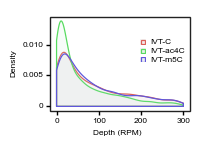

/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 1.8 x 1.22 in image.
/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/IVT_sequencing_depth.pdf
/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 1539 rows containing non-finite values.


In [9]:
import numpy as np

count_dict_overlap={}

for contig in count_dict_unmod:

    if contig not in count_dict_overlap:
        count_dict_overlap[contig]=[0]*3
    count_dict_overlap[contig][0]=count_dict_unmod[contig]
    


for contig in count_dict_m5C:

    if contig not in count_dict_overlap:

        count_dict_overlap[contig]=[0]*3
    count_dict_overlap[contig][1]=count_dict_m5C[contig]
    
    
for contig in count_dict_ac4C:

    if contig not in count_dict_overlap:

        count_dict_overlap[contig]=[0]*3
    count_dict_overlap[contig][2]=count_dict_ac4C[contig]    
    
    
print(len(count_dict_overlap))
count=0
contig_list=[]
for contig in count_dict_overlap:

    if count_dict_overlap[contig][0]<1 or count_dict_overlap[contig][1]<1 or count_dict_overlap[contig][2]<1:
        contig_list.append(contig)
        continue

for contig in contig_list:

    count_dict_overlap.pop(contig)
    


#reads count to PPM
import pandas as pd
mapped_reads=[454741,303881,386863]


            
for contig in count_dict_overlap:
    read_count=count_dict_overlap[contig]
    for i in range(3):
        read_count[i]=read_count[i]/mapped_reads[i]*1e6
    count_dict_overlap[contig]=read_count
data=pd.DataFrame.from_dict(count_dict_overlap,orient="index")   



import pandas as pd
from plotnine import *

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'

import plotnine
plotnine.options.base_family = 'Arial'

data.rename(columns = {0:'IVT-C', 1:'IVT-m5C',2:"IVT-ac4C"}, inplace = True)
data["id"]=data.index

data=pd.melt(data,id_vars="id")
data=data.rename(columns={"variable":"modification"})
print(data)
p1=(ggplot()
    +geom_density(data,aes(x="value",color='modification', fill='modification'),alpha=0.1)
    +theme(figure_size=[1.8,1.22],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.75,0.65), 
        legend_key_size=4) #change legend text font size)))

    +xlim(0,300)
    +labs(x = "Depth (RPM)",y="Density")
    #+guides(color = guide_legend(title = "modification"))
    +scale_fill_manual(["#ffb2b2","#b2e7cb","#b2d4ec"])
   
   )

print(p1)
p1.save('figure/IVT_sequencing_depth.pdf')

In [19]:
#length boxplot

reference="/home/wuyou/Projects/Os_AD/data/transcripts.fasta"


with open(reference) as f:
    reference_length_dict={}
    for line in f:
        line=line.rstrip()
        if ">" in line:
            contig=line[1:].split(" ")[0]
            sequence=""
        else:
            sequence+=line
            reference_length_dict[contig]=len(sequence)

read_length=[]
modification=[]

sam_file="/home/wuyou/Projects/Os_AD/data/unmod.sorted.sam"
with open(sam_file) as f:
    for i,line in enumerate(f):
        read_id=line.split("\t")[0]
        flag=line.split("\t")[1]
        if flag != "0":
            continue
        
        contig=line.split("\t")[2]
        sequence=line.split("\t")[9]
        length_ratio=len(sequence)#/reference_length_dict[contig]
        
        #if length_ratio>1:
            #length_ratio=1
        
        if i%10==0:
        
            read_length.append(length_ratio)
            modification.append("IVT-C")

        


sam_file="/home/wuyou/Projects/Os_AD/data/m5C.sorted.sam"
with open(sam_file) as f:
    for i,line in enumerate(f):
        read_id=line.split("\t")[0]
        flag=line.split("\t")[1]
        if flag != "0":
            continue
        
        contig=line.split("\t")[2]
        sequence=line.split("\t")[9]
        length_ratio=len(sequence)#/reference_length_dict[contig]
        
        #if length_ratio>1:
            #length_ratio=1
            
        if i%10==0:
            read_length.append(length_ratio)
            modification.append("IVT-m5C")
            
            
sam_file="/data/wuyou/TandemMod_crop/data/IVET_ac4C/ac4C.sam"
with open(sam_file) as f:
    for i,line in enumerate(f):
        read_id=line.split("\t")[0]
        flag=line.split("\t")[1]
        if flag != "0":
            continue
        
        contig=line.split("\t")[2]
        sequence=line.split("\t")[9]
        length_ratio=len(sequence)#/reference_length_dict[contig]
        
        #if length_ratio>1:
            #length_ratio=1
            
        if i%10==0:
            read_length.append(length_ratio)
            modification.append("IVT-ac4C")            
            

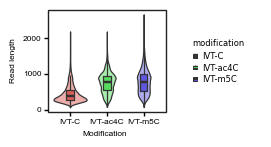

/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 1.52 x 1.33 in image.
/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/IVT_read_length.pdf


In [29]:
from plotnine import *
import pandas as pd

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'

data=pd.DataFrame({"read length":read_length,"modification":modification}) 
p = (ggplot()
        
        +geom_violin(data,aes(x="modification",y="read length",group="modification",fill="modification"),alpha=0.5)
        +geom_boxplot(data,aes(x="modification",y="read length",group="modification",fill="modification"),width=0.2,outlier_alpha=0)
        +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            figure_size=[1.52,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.60,0.3),
            legend_position=None,
            legend_key_size=4) #change legend text font size
        +labs(x = "Modification", y ="Read length",Color="Dataset")
        
)

print(p)
p.save('figure/IVT_read_length.pdf')

52
30003 30003
plotting


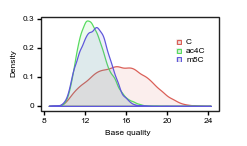

/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 2.3 x 1.22 in image.
/home/wuyou/.conda/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/statistics_base_quality.pdf


In [5]:
#read quality plot

from scipy import interpolate
import traceback
#import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from plotnine import *
import pandas as pd
import re
import numpy as np
from statsmodels import robust

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'

import plotnine

plotnine.options.base_family = 'Arial'


def get_mean_quality(file):
    count=0
    mean_quality_list=[]
    next=""
    with open(file) as f:
        for line in f:
            line=line.rstrip()
            if "runid" in line:
                next="sequence"
                continue
            if  line=="+":
                next="quality"
                continue
            if next=="quality":
                base_quality_string=line
                base_quality_list=[ord(char) for char in base_quality_string]
                mean_quality=np.mean(base_quality_list)-33
                mean_quality_list.append(mean_quality)
                count+=1
            if count>10000:
                break
    return mean_quality_list


X=[]
Y=[]

file="/home/wuyou/Projects/Os_AD/data/unmod.fastq"
mean_quality_list=get_mean_quality(file)
X.extend(mean_quality_list)
Y.extend(["C"]*len(mean_quality_list))



file="/home/wuyou/Projects/Os_AD/data/m5C.fastq"
mean_quality_list=get_mean_quality(file)
X.extend(mean_quality_list)
Y.extend(["m5C"]*len(mean_quality_list))

file="/data/wuyou/TandemMod_crop/data/IVET_ac4C/ac4C.fastq"
mean_quality_list=get_mean_quality(file)
X.extend(mean_quality_list)
Y.extend(["ac4C"]*len(mean_quality_list))




print(52)
print(len(X),len(Y))
data=pd.DataFrame(X)
#data["label"]=Y
data.columns=["base quality"]
data["modification"]=Y

#####################################################################################################################
print("plotting")
p1=(ggplot()
    +geom_density(data,aes(x="base quality",color='modification', fill='modification'),alpha=0.1)
    +theme(figure_size=[2.3,1.22],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0.0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0.0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=0), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        legend_position=(0.81,0.65), 
        legend_key_size=4) #change legend text font size)))
    +labs(x = "Base quality",y="Density")
   )

print(p1)
"""
p2=(ggplot()+geom_line(data_mod,aes(x="x",y="value",group="variable"),alpha=0.05,color="red")
    +geom_line(data_unmod,aes(x="x",y="value",group="variable"),alpha=0.05,color="black")
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0.3,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0.3,color=black),
            panel_border=element_rect(color=black, size=1),
            legend_position = "none",
          figure_size=[6,2.5])+labs(y = "normalized signal")   
)
p2
"""
p1.save('figure/statistics_base_quality.pdf')


#ggpurb

